# Homogeneous system

In this notebook we solve the Usadel equations for an homogeneous system and we compare the effect of different type of depairing.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pyusadel import (
    DifferentialOperators,
    UsadelProblem,
    thermal_broadening,
    trivial_diffops,
)

In [36]:
Nsites = 1

do = trivial_diffops()

h_x = np.array([0.40])
h_y = np.array([0.00])
h_z = np.array([0.00])
D = 0
T = 0.2
Gamma = 1e-3

In [37]:
up1 = UsadelProblem(
    Nsites=1,
    diff_ops=do,
    h_x=h_x,
    h_y=h_y,
    h_z=h_z,
    D=D,
    T=T,
    Gamma=Gamma,
    use_dense=True,
)

up1.Delta = np.array([1.0])

up1.set_real_omega_ax(-4, 4, 401)
up1.solve_spectral(print_exit_status=False, gamma=1)

e1 = up1.get_omega_ax_r()
dos1 = up1.get_ldos()
dos1u = up1.get_spin_resolved_ldos("x")[0]
dos1d = up1.get_spin_resolved_ldos("x")[1]

In [38]:
up2 = UsadelProblem(
    Nsites=1,
    diff_ops=do,
    h_x=h_x,
    h_y=h_y,
    h_z=h_z,
    tau_sf_inv= np.array([0.2]),
    D=D,
    T=T,
    Gamma=Gamma,
    use_dense=True,
)

up2.Delta = np.array([1.0])

up2.set_real_omega_ax(-4, 4, 401)
up2.solve_spectral(print_exit_status=False, gamma=1)

e2 = e2
dos2 = up2.get_ldos()
dos2u = up2.get_spin_resolved_ldos("x")[0]
dos2d = up2.get_spin_resolved_ldos("x")[1]

In [39]:
up3 = UsadelProblem(
    Nsites=1,
    diff_ops=do,
    h_x=h_x,
    h_y=h_y,
    h_z=h_z,
    tau_so_inv = np.array([0.2]),
    D=D,
    T=T,
    Gamma=Gamma,
    use_dense=True,
)

up3.Delta = np.array([1.0])

up3.set_real_omega_ax(-4, 4, 401)
up3.solve_spectral(print_exit_status=False, gamma=1)


e3 = e3
dos3 = up3.get_ldos()
dos3u = up3.get_spin_resolved_ldos("x")[0]
dos3d = up3.get_spin_resolved_ldos("x")[1]

In [40]:
up4 = UsadelProblem(
    Nsites=1,
    diff_ops=do,
    h_x=h_x,
    h_y=h_y,
    h_z=h_z,
    tau_ob_inv = np.array([0.2])/8,
    D=D,
    T=T,
    Gamma=Gamma,
    use_dense=True,
)

up4.Delta = np.array([1.0])

up4.set_real_omega_ax(-4, 4, 401)
up4.solve_spectral(print_exit_status=False, gamma=1)

e4 = up4.get_omega_ax_r()
dos4 = up4.get_ldos()
dos4u = up4.get_spin_resolved_ldos("x")[0]
dos4d = up4.get_spin_resolved_ldos("x")[1]

In [41]:
up5 = UsadelProblem(
    Nsites=1,
    diff_ops=do,
    h_x=h_x,
    h_y=h_y,
    h_z=h_z,
    D=D,
    T=T,
    Gamma=0.01,
    use_dense=True,
)

up5.Delta = np.array([1.0])

up5.set_real_omega_ax(-4, 4, 401)
up5.solve_spectral(print_exit_status=False, gamma=1)

e5 = up5.get_omega_ax_r()
dos5 = up5.get_ldos()
dos5u = up5.get_spin_resolved_ldos("x")[0]
dos5d = up5.get_spin_resolved_ldos("x")[1]

In [42]:
up6 = UsadelProblem(
    Nsites=1,
    diff_ops=do,
    h_x=h_x,
    h_y=h_y,
    h_z=h_z,
    tau_so_inv = np.array([0.2]),
    D=D,
    T=T,
    Gamma=Gamma,
    use_dense=True,
)

up6.Delta = np.array([1.0])

up6.set_real_omega_ax(-4, 4, 401)
up6.solve_spectral(print_exit_status=False, gamma=1)


e6 = up6.get_omega_ax_r()
dos6 = thermal_broadening(e6, up6.get_ldos()[:, 0], 0.1)
dos6u = thermal_broadening(e6, up6.get_spin_resolved_ldos("x")[0][:, 0], 0.1)
dos6d = thermal_broadening(e6, up6.get_spin_resolved_ldos("x")[1][:, 0], 0.1)

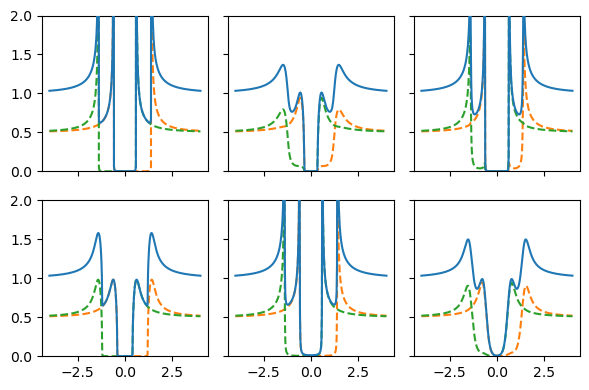

In [44]:
ylim = (0, 2)

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(
    nrows=2, ncols=3, 
    figsize = (6, 4),
    sharex=True, sharey=True)
     
ax1.plot(e1, dos1, label=r"$\rho$", zorder=10)
ax1.plot(e1, dos1u, '--', label=r"$\rho_\uparrow$")
ax1.plot(
    e1, dos1d, '--', label=r"$\rho_\downarrow$"
)
ax1.set_ylim(*ylim)
#ax1.legend()

ax2.plot(e2, dos2, label=r"$\rho$", zorder=10)
ax2.plot(e2, dos2u, '--', label=r"$\rho_\uparrow$")
ax2.plot(
    e2, dos2d, '--', label=r"$\rho_\downarrow$"
)
ax2.set_ylim(*ylim)
#ax2.legend()

ax3.plot(e3, dos3, label=r"$\rho$", zorder=10)
ax3.plot(e3, dos3u, '--', label=r"$\rho_\uparrow$")
ax3.plot(
    e3, dos3d, '--', label=r"$\rho_\downarrow$"
)
ax3.set_ylim(*ylim)
#ax3.legend()

ax4.plot(e4, dos4, label=r"$\rho$", zorder=10)
ax4.plot(e4, dos4u, '--', label=r"$\rho_\uparrow$")
ax4.plot(
    e3, dos4d, '--', label=r"$\rho_\downarrow$"
)
ax4.set_ylim(*ylim)


ax5.plot(e5, dos5, label=r"$\rho$", zorder=10)
ax5.plot(e5, dos5u, '--', label=r"$\rho_\uparrow$")
ax5.plot(
    e5, dos5d, '--', label=r"$\rho_\downarrow$"
)
ax5.set_ylim(*ylim)


ax6.plot(e6, dos6, label=r"$\rho$", zorder=10)
ax6.plot(e6, dos6u, '--', label=r"$\rho_\uparrow$")
ax6.plot(
    e6, dos6d, '--', label=r"$\rho_\downarrow$"
)
ax6.set_ylim(*ylim)

fig.tight_layout()

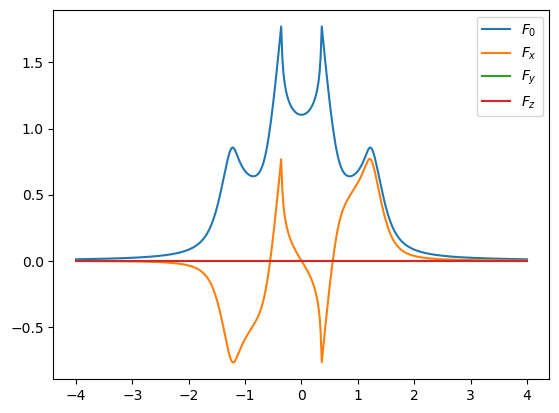

In [35]:
fig, ax = plt.subplots()
ax.plot(up2.get_omega_ax_r(), up2.get_anomalous_correlator()[0], label="$F_{0}$")
ax.plot(up2.get_omega_ax_r(), up2.get_anomalous_correlator()[1], label="$F_{x}$")
ax.plot(up2.get_omega_ax_r(), up2.get_anomalous_correlator()[2], label="$F_{y}$")
ax.plot(up2.get_omega_ax_r(), up2.get_anomalous_correlator()[3], label="$F_{z}$")
ax.legend()